#                                            Market Basket Insights
# Phase 4 Development Phase 2 - Performing Different Activities Like Featuer Engineering ,Model training,Evaluation etc.,

# Introduction:

Welcome to this notebook where we will explore the fascinating world of Market Basket Analysis using a real-world dataset. Market Basket Analysis is a powerful technique that allows us to uncover patterns and associations between items that customers tend to purchase together. By analyzing these patterns, we can gain valuable insights that can drive business decisions and strategies.

In this notebook, we will work with a Market Basket dataset that captures customer transactions in a retail or e-commerce setting. The dataset provides a wealth of information about customer purchases, allowing us to dive deep into their buying behavior. By leveraging data mining techniques and association rule mining algorithms, we will unravel the relationships between items and discover interesting patterns.

Through this analysis, we can derive actionable insights to improve various aspects of business operations. We can identify frequently co-purchased items, enabling us to make targeted product recommendations and enhance cross-selling and upselling opportunities. By optimizing product placement and store layout based on association patterns, we can create more enticing shopping experiences. Furthermore, we can design effective promotional campaigns by leveraging the discovered item associations, resulting in higher customer engagement and increased sales.

In this notebook, we will take you through the entire process of Market Basket Analysis, from data preprocessing to association rule mining and visualization. By following along with the provided code and explanations, you will gain a solid understanding of how to extract valuable insights from Market Basket datasets and apply them to real-world scenarios.

So let's dive in and unlock the secrets hidden within the Market Basket dataset to gain a deeper understanding of customer behavior and optimize business strategies!

## Overview of the Market Basket Analysis dataset

This dataset contains 522,065 rows and 7 attributes that provide valuable information about customer transactions and product details. Here is a breakdown of the attributes:

    BillNo: This attribute represents a 6-digit number assigned to each transaction. It serves as a unique identifier for identifying individual purchases.

    Itemname: This attribute stores the name of the product purchased in each transaction. It provides nominal data representing different products.

    Quantity: This attribute captures the quantity of each product purchased in a transaction. It is a numeric value that indicates the number of units of a specific item.

    Date: The Date attribute records the day and time when each transaction occurred. It provides valuable information about the timing of purchases.

    Price: This attribute represents the price of each product. It is a numeric value that indicates the cost of a single unit of the item.

    CustomerID: Each customer is assigned a 5-digit number as their unique identifier. This attribute helps track customer-specific information and analyze individual buying patterns.

    Country: The Country attribute denotes the name of the country where each customer resides. It provides nominal data representing different geographic regions.

By analyzing this dataset, we can gain insights into customer purchasing behavior, identify popular products, examine sales trends over time, and explore the impact of factors such as price and geography on customer preferences. These insights can be used to optimize marketing strategies, improve inventory management, and enhance customer satisfaction.

# Data Preprocessing

## Importing Required Libraries

In [1]:
import numpy as np  # Import numpy library for efficient array operations
import pandas as pd  # Import pandas library for data processing
import matplotlib.pyplot as plt  # Import matplotlib.pyplot for data visualization

## Data Loading
Retrieving and Loading the Dataset

In [2]:
df = pd.read_csv('../input/market-basket-analysis/Assignment-1_Data.csv', sep=';',parse_dates=['Date'])
df.head()

/tmp/ipykernel_20/3267796271.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../input/market-basket-analysis/Assignment-1_Data.csv', sep=';',parse_dates=['Date'])


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-01-12 08:26:00,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,"3,39",17850.0,United Kingdom


In [3]:
# Convert the 'Price' column to float64 data type after replacing commas with dots
df['Price'] = df['Price'].str.replace(',', '.').astype('float64')

In [4]:
# Display the information about the DataFrame which is to provide an overview of the DataFrame's structure and column data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      522064 non-null  object        
 1   Itemname    520609 non-null  object        
 2   Quantity    522064 non-null  int64         
 3   Date        522064 non-null  datetime64[ns]
 4   Price       522064 non-null  float64       
 5   CustomerID  388023 non-null  float64       
 6   Country     522064 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 27.9+ MB


In [5]:
# Calculate the number of missing values for each column and sort them in descending order
df.isna().sum().sort_values(ascending=False)

CustomerID    134041
Itemname        1455
BillNo             0
Quantity           0
Date               0
Price              0
Country            0
dtype: int64

In [6]:
# Calculate the total price by multiplying the quantity and price columns
df['Total_Price'] = df.Quantity * df.Price

In [7]:
df.describe(include='all')

/tmp/ipykernel_20/2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Total_Price
count,522064.0,520609,522064.000000,522064,522064.000000,388023.000000,522064,522064.000000
unique,21665.0,4185,NaN,19641,NaN,NaN,30,NaN
top,573585.0,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom,NaN
freq,1114.0,2269,NaN,1114,NaN,NaN,487622,NaN
first,NaN,NaN,NaN,2010-01-12 08:26:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2011-12-10 17:19:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,10.090435,NaN,3.826801,15316.931710,NaN,19.690633
std,NaN,NaN,161.110525,NaN,41.900599,1721.846964,NaN,273.068938
min,NaN,NaN,-9600.000000,NaN,-11062.060000,12346.000000,NaN,-11062.060000
25%,NaN,NaN,1.000000,NaN,1.250000,13950.000000,NaN,3.750000


In [8]:
# Print the number of unique countries in the 'Country' column
print("Number of unique countries:", df['Country'].nunique())

# Calculate and print the normalized value counts of the top 5 countries in the 'Country' column
print(df['Country'].value_counts(normalize=True)[:5])

Number of unique countries: 30
United Kingdom    0.934027
Germany           0.017320
France            0.016105
Spain             0.004760
Netherlands       0.004526
Name: Country, dtype: float64


Considering that the majority of transactions (approximately 93%) in the dataset originate from the UK, the 'Country' column may not contribute significant diversity or variability to the analysis. Therefore, we can choose to remove the 'Country' column from the DataFrame df. we indicate that we want to drop a column, This step allows us to focus on other attributes that may provide more valuable insights for our analysis.

In [9]:
# Delete the 'Country' column from the DataFrame
df.drop('Country', axis=1, inplace=True)

In [10]:
# Filter the DataFrame to display rows where 'BillNo' column contains non-digit values
df[df['BillNo'].str.isdigit() == False]

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Total_Price
288772,A563185,Adjust bad debt,1,2011-12-08 14:50:00,11062.06,NaN,11062.06
288773,A563186,Adjust bad debt,1,2011-12-08 14:51:00,-11062.06,NaN,-11062.06
288774,A563187,Adjust bad debt,1,2011-12-08 14:52:00,-11062.06,NaN,-11062.06


Since the item name "Adjust bad debt" was filled accidentally and does not provide any useful information for our analysis, we can choose to remove the corresponding rows from the DataFrame. The code snippet above filters the DataFrame df to retain only the rows where the 'Itemname' column does not contain the value "Adjust bad debt". This operation effectively eliminates the rows associated with the accidental data entry, ensuring the dataset is free from this irrelevant item name.

In [11]:
# Remove rows where the 'Itemname' column contains "Adjust bad debt"
df = df[df['Itemname'] != "Adjust bad debt"]

In [12]:
# Here to check if all BillNo doesn't inculde letters 
df['BillNo'].astype("int64")

0         536365
1         536365
2         536365
3         536365
4         536365
           ...  
522059    581587
522060    581587
522061    581587
522062    581587
522063    581587
Name: BillNo, Length: 522061, dtype: int64

In [13]:
# Calculate the sum of 'Price' for rows where 'Itemname' is missing
df[df['Itemname'].isna()] ['Price'].sum()

0.0

Exploring Rows with Missing Item Names:

To investigate the data where the 'Itemname' column has missing values, we can filter the dataset to display only those rows. This subset of the data will provide insights into the records where the item names are not available.

In [14]:
# Filter the DataFrame to display rows where 'Itemname' is missing
df[df['Itemname'].isna()]

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Total_Price
613,536414,NaN,56,2010-01-12 11:52:00,0.0,NaN,0.0
1937,536545,NaN,1,2010-01-12 14:32:00,0.0,NaN,0.0
1938,536546,NaN,1,2010-01-12 14:33:00,0.0,NaN,0.0
1939,536547,NaN,1,2010-01-12 14:33:00,0.0,NaN,0.0
1940,536549,NaN,1,2010-01-12 14:34:00,0.0,NaN,0.0
...,...,...,...,...,...,...,...
515623,581199,NaN,-2,2011-07-12 18:26:00,0.0,NaN,-0.0
515627,581203,NaN,15,2011-07-12 18:31:00,0.0,NaN,0.0
515633,581209,NaN,6,2011-07-12 18:35:00,0.0,NaN,0.0
517266,581234,NaN,27,2011-08-12 10:33:00,0.0,NaN,0.0


Upon examining the data where the 'Itemname' column has missing values, it becomes evident that these missing entries do not contribute any meaningful information. Given that the item names are not available for these records, it suggests that these instances may not be crucial for our analysis. As a result, we can consider these missing values as non-significant and proceed with our analysis without incorporating them.

In [15]:
# Filter the DataFrame to exclude rows where 'Itemname' is missing (not NaN)
df = df[df['Itemname'].notna()]

# Print the number of unique items in the 'Itemname' column
print("Number of unique items:", df['Itemname'].nunique())

# Calculate and print the normalized value counts of the top 5 items in the 'Itemname' column
print(df['Itemname'].value_counts(normalize=True)[:5])

Number of unique items: 4184
WHITE HANGING HEART T-LIGHT HOLDER    0.004358
JUMBO BAG RED RETROSPOT               0.004009
REGENCY CAKESTAND 3 TIER              0.003707
PARTY BUNTING                         0.003221
LUNCH BAG RED RETROSPOT               0.003016
Name: Itemname, dtype: float64


A curious observation has caught our attention—the presence of a negative quantity in the 515,623rd row. 

we are intrigued by the existence of negative quantities within the dataset. To gain a deeper understanding of this phenomenon, we focus our attention on these specific instances and aim to uncover the underlying reasons behind their occurrence. Through this exploration, we expect to gain valuable insights into the nature of these negative quantities and their potential impact on our analysis. Our investigation aims to reveal the intriguing stories that lie within this aspect of the data.

In [16]:
# Filter the DataFrame to display rows where 'Quantity' is less than 1
df[df['Quantity'] < 1]

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Total_Price
7122,537032,?,-30,2010-03-12 16:50:00,0.0,NaN,-0.0
12926,537425,check,-20,2010-06-12 15:35:00,0.0,NaN,-0.0
12927,537426,check,-35,2010-06-12 15:36:00,0.0,NaN,-0.0
12973,537432,damages,-43,2010-06-12 16:10:00,0.0,NaN,-0.0
20844,538072,faulty,-13,2010-09-12 14:10:00,0.0,NaN,-0.0
...,...,...,...,...,...,...,...
515634,581210,check,-26,2011-07-12 18:36:00,0.0,NaN,-0.0
515636,581212,lost,-1050,2011-07-12 18:38:00,0.0,NaN,-0.0
515637,581213,check,-30,2011-07-12 18:38:00,0.0,NaN,-0.0
517209,581226,missing,-338,2011-08-12 09:56:00,0.0,NaN,-0.0


Given the observation that negative quantities might be filled with system issues or irrelevant information for our analysis, it is reasonable to proceed with removing these rows from the dataset. By doing so, we can ensure the accuracy and reliability of our data, as well as eliminate potential biases or misleading information stemming from negative quantities.

In [17]:
# Remove rows where 'Quantity' is less than 1
df = df[df['Quantity'] >= 1]

Next, we turn our attention to the presence of missing values in the 'CustomerID' column. By investigating these missing values, we aim to identify any potential issues or data quality concerns associated with them. Analyzing the impact of missing 'CustomerID' values will help us assess the completeness and reliability of the dataset, enabling us to make informed decisions on handling or imputing these missing values. Let's dive deeper into this aspect and gain a comprehensive understanding of any issues related to missing 'CustomerID' values.

In [18]:
# Select a random sample of 30 rows where 'CustomerID' is missing
df[df['CustomerID'].isna()].sample(30)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Total_Price
214695,556428,JUMBO BAG PINK VINTAGE PAISLEY,5,2011-10-06 13:23:00,4.13,NaN,20.65
107468,545714,SET/20 RED RETROSPOT PAPER NAPKINS,2,2011-07-03 10:12:00,2.46,NaN,4.92
502141,580367,TROPICAL PASSPORT COVER,1,2011-02-12 16:39:00,4.13,NaN,4.13
483171,578833,NATURAL SLATE HEART CHALKBOARD,2,2011-11-25 15:23:00,5.79,NaN,11.58
141679,549023,JAM MAKING SET PRINTED,2,2011-05-04 16:27:00,3.29,NaN,6.58
418976,574076,SPACEBOY CHILDRENS BOWL,1,2011-02-11 15:38:00,2.46,NaN,2.46
286153,562934,SET/3 RED GINGHAM ROSE STORAGE BOX,1,2011-10-08 16:56:00,7.46,NaN,7.46
65382,541827,AIRLINE BAG VINTAGE WORLD CHAMPION,2,2011-01-21 17:05:00,4.13,NaN,8.26
363110,569545,ANGEL DECORATION PAINTED ZINC,5,2011-04-10 16:37:00,0.63,NaN,3.15
442144,575875,SET OF 3 WOODEN TREE DECORATIONS,2,2011-11-11 13:06:00,2.46,NaN,4.92


This sample can provide us with a glimpse into the specific instances where 'CustomerID' is missing, aiding us in further analysis or decision-making related to handling these missing values.

Upon analyzing a sample of rows where the 'CustomerID' is missing, it appears that there is no discernible pattern or specific reason behind the absence of these values. This observation suggests that the missing 'CustomerID' entries were not filled accidentally or due to a systematic issue. Instead, it is possible that these missing values occur naturally in the dataset, without any particular significance or underlying cause.

#### Identifying Issues in the Price Column: Ensuring Data Quality
In our analysis, we shift our focus to the 'Price' column and investigate it for any potential issues or anomalies. By thoroughly examining the data within this column, we aim to identify any irregularities, inconsistencies, or outliers that may affect the overall quality and integrity of the dataset. Analyzing the 'Price' column is crucial in ensuring accurate and reliable pricing information for our analysis. Let's dive deeper into the 'Price' column and uncover any issues that may require attention.

In [19]:
# Counting the number of rows where the price is zero
zero_price_count = len(df[df['Price'] == 0])
print("Number of rows where price is zero:", zero_price_count)

# Counting the number of rows where the price is negative
negative_price_count = len(df[df['Price'] < 0])
print("Number of rows where price is negative:", negative_price_count)

Number of rows where price is zero: 583
Number of rows where price is negative: 0


our attention now turns to the presence of zero charges in the 'Price' column. It is important to explore instances where products were offered free of cost, as this information can provide valuable insights into promotional activities, giveaways, or other unique aspects of the dataset. By examining the data related to zero charges in the 'Price' column, we can gain a deeper understanding of these transactions and their potential impact on our analysis. Let's delve into the details of these zero-priced transactions and uncover any significant findings.

In [20]:
# Selecting a random sample of 20 rows where the price is zero
df[df['Price'] == 0].sample(20)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Total_Price
407408,573169,Found by jackie,1,2011-10-28 09:56:00,0.0,NaN,0.0
51894,540832,RED RETROSPOT CHARLOTTE BAG,1,2011-11-01 14:42:00,0.0,NaN,0.0
101152,545176,RECIPE BOX BLUE SKETCHBOOK DESIGN,1,2011-02-28 14:19:00,0.0,NaN,0.0
416909,573991,check,36,2011-02-11 11:19:00,0.0,NaN,0.0
186886,553539,CERAMIC STRAWBERRY CAKE MONEY BANK,1,2011-05-17 15:27:00,0.0,NaN,0.0
233712,558340,RECIPE BOX PANTRY YELLOW DESIGN,1,2011-06-28 14:01:00,0.0,NaN,0.0
14051,537534,RED KITCHEN SCALES,1,2010-07-12 11:48:00,0.0,NaN,0.0
233684,558340,CHILDS GARDEN SPADE BLUE,1,2011-06-28 14:01:00,0.0,NaN,0.0
39894,539750,FAWN BLUE HOT WATER BOTTLE,1,2010-12-21 15:40:00,0.0,NaN,0.0
119506,546933,CERAMIC STRAWBERRY MONEY BOX,2,2011-03-18 11:02:00,0.0,NaN,0.0


#### Removing Rows with Zero Price: Eliminating Misleading Data Entries

Upon reviewing the sample of rows where the price is zero, we have identified that these entries might provide misleading or inaccurate information for our analysis. Therefore, it is prudent to proceed with removing these rows from the dataset to ensure the integrity and reliability of our analysis.

In [21]:
# Remove rows where the price is zero
df = df[df['Price'] != 0]

# Data Understanding: Exploring and Interpreting the Dataset

In the data analysis process, data understanding plays a crucial role in gaining insights and formulating meaningful conclusions. By thoroughly examining the dataset, we aim to understand its structure, contents, and underlying patterns. This understanding empowers us to make informed decisions regarding data cleaning, feature engineering, and subsequent analysis steps.

Key aspects of data understanding include:

    Exploring the Dataset: We investigate the dataset's dimensions, such as the number of rows and columns, to gauge its size and complexity. Additionally, we examine the data types of each column to understand the nature of the variables.

    Assessing Data Quality: We scrutinize the data for inconsistencies, outliers, or other data quality issues that may require attention. Addressing these issues ensures the reliability and accuracy of the data.

    Identifying Relationships: We analyze the relationships between variables by examining correlations, associations, or dependencies. This analysis allows us to uncover meaningful connections that can drive insights and guide our analysis.

    Detecting Patterns and Trends: We look for recurring patterns, trends, or distributions within the data. This step can reveal valuable information about customer behavior, market dynamics, or other relevant factors.

By thoroughly understanding the dataset, we lay the foundation for meaningful data analysis and generate insights that contribute to informed decision-making and problem-solving.

Text(0.5, 0, 'Date (Month)')

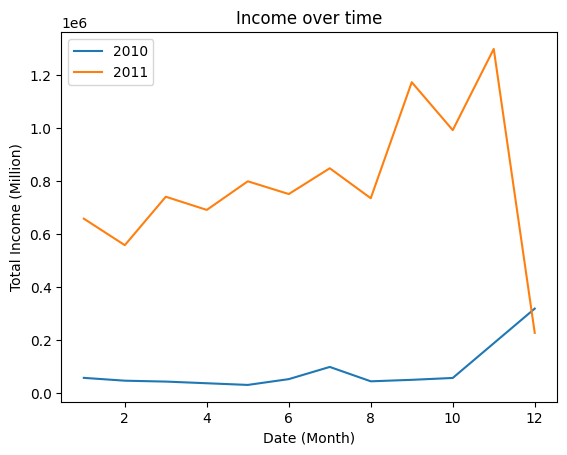

In [22]:
# Grouping the data by month and summing the total price for the year 2010
df[df["Date"].dt.year == 2010].groupby(df["Date"].dt.month)["Total_Price"].sum().plot()

# Grouping the data by month and summing the total price for the year 2011
df[df["Date"].dt.year == 2011].groupby(df["Date"].dt.month)["Total_Price"].sum().plot()

# Adding legend and plot labels
plt.legend(["2010", "2011"])
plt.title("Income over time")
plt.ylabel('Total Income (Million)')
plt.xlabel("Date (Month)")

The code snippet above creates a line plot to visualize the income over time for the years 2010 and 2011. First, the data is filtered based on the year using the dt.year attribute of the 'Date' column. The data is then grouped by month, and the 'Total_Price' column is summed. Two line plots are created, one for each year, showing the monthly total income. The legend is added to indicate the respective years, and the plot is labeled with a title, y-axis label, and x-axis label. This visualization allows us to observe the trend and compare the income between the two years.

Upon observing the line plot of income over time for the years 2010 and 2011, it becomes apparent that the sales remained relatively stable and consistent until October 2010. This suggests that the business was growing steadily during this period, as the sales continued to increase.

However, a significant drop in sales is observed in the last month of the dataset. This sudden decline indicates a notable deviation from the previously observed growth trend. Exploring the potential factors contributing to this drop becomes crucial in understanding the underlying reasons for the decline in sales during that specific period.

To verify if the data is complete for the entire last month in the dataset, we can compare the maximum date in the 'Date' column with the last day of that month. If they match, it indicates that the data is filled for the entire last month.

In [23]:
df["Date"].max()

Timestamp('2011-12-10 17:19:00')

Based on the finding that the data is only available for 10 days in the last month, it becomes evident that the significant drop in sales observed during that period is likely due to the limited data rather than an actual decline in sales. The incomplete data for the last month may not provide a comprehensive representation of the sales performance during that period.

To gain a more accurate understanding of the sales trend, it is advisable to consider a broader time frame with complete data. Analyzing a more extended period that encompasses multiple months or years would provide a more reliable assessment of the sales performance and allow for more meaningful insights and conclusions.

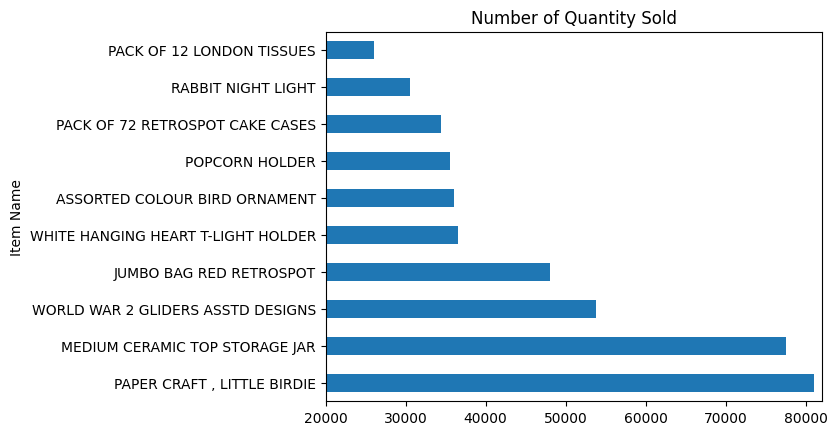

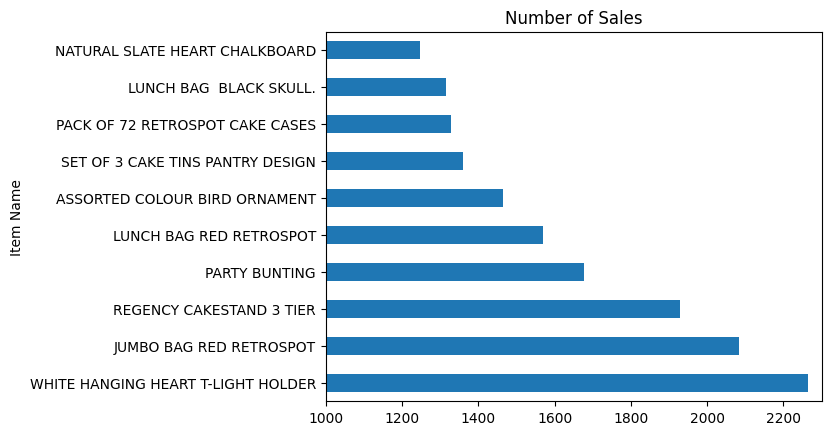

In [24]:
# Plotting the top 10 most sold products by quantity
df.groupby('Itemname')['Quantity'].sum().sort_values(ascending=False)[:10].plot(kind='barh', title='Number of Quantity Sold')
plt.ylabel('Item Name')
plt.xlim(20000, 82000)
plt.show()

# Plotting the top 10 most sold products by count
df['Itemname'].value_counts(ascending=False)[:10].plot(kind='barh', title='Number of Sales')
plt.ylabel('Item Name')
plt.xlim(1000, 2300)
plt.show()

The code snippet above creates two horizontal bar plots to visualize the most sold products based on quantity and count, respectively.

In the first plot, the top 10 items are determined by summing the 'Quantity' column for each unique 'Itemname' and sorting them in descending order. The plot displays the number of quantities sold for each item.

The second plot showcases the top 10 items based on the count of sales for each unique 'Itemname'. The value_counts function counts the occurrences of each item and sorts them in descending order. The plot represents the number of times each item has been sold.

Observing the plots, we can infer that there are products that are sold more frequently (higher count) compared to others, despite having relatively lower quantities sold per transaction. This indicates the presence of items that are commonly purchased in larger quantities at once. These products might include items that are frequently bought in bulk or items that are typically sold in larger packages or quantities.

This insight highlights the importance of considering both the quantity sold and the count of sales when analyzing the popularity and demand for different products. It suggests that some items may have a higher turnover rate due to frequent purchases, while others may have a higher quantity per sale, leading to different sales patterns and customer behaviors. Understanding these dynamics can be valuable for inventory management, pricing strategies, and identifying customer preferences.

# Association Rules

Association rules are generated using the Apriori algorithm, which is a popular algorithm for discovering interesting relationships or associations among items in a dataset. Association rule mining is commonly used in market basket analysis, where the goal is to find associations between items frequently purchased together.

The generated association rules provide insights into the relationships between different items or itemsets in the dataset. Each association rule consists of two parts: the antecedent (or left-hand side) and the consequent (or right-hand side). The antecedent represents the item(s) or itemset(s) that act as a condition or premise, while the consequent represents the item(s) or itemset(s) that are predicted or inferred from the antecedent.

The association rules are evaluated based on different metrics, such as support, confidence, lift, leverage, and conviction. These metrics provide measures of the interestingness or strength of the rules. 

- Support measures the proportion of transactions in the dataset that contain both the antecedent and the consequent.
- Confidence measures the conditional probability of the consequent given the antecedent.
- Lift measures the ratio of observed support to expected support, indicating the strength of the association between the antecedent and the consequent.
- Leverage measures the difference between the observed support and the expected support, indicating the significance of the association.
- Conviction measures the ratio of the expected confidence to the observed confidence, indicating the degree of dependency between the antecedent and the consequent.

By examining the association rules, you can identify interesting relationships, co-occurrences, or patterns among items, which can be used for various purposes such as product recommendation, market segmentation, or inventory management.

To generate the association rules, we use the Apriori algorithm with a minimum support threshold of 0.05 (5%). This ensures that only itemsets with sufficient frequency in the dataset are considered.

Let's explore the generated association rules:


In [25]:
# Assign the original DataFrame to df2
df2 = df

# Filter rows based on item occurrences
item_counts = df2['Itemname'].value_counts(ascending=False)
filtered_items = item_counts.loc[item_counts > 1].reset_index()['index']
df2 = df2[df2['Itemname'].isin(filtered_items)]

# Filter rows based on bill number occurrences
bill_counts = df2['BillNo'].value_counts(ascending=False)
filtered_bills = bill_counts.loc[bill_counts > 1].reset_index()['index']
df2 = df2[df2['BillNo'].isin(filtered_bills)]

#### Filtering is done based on item occurrences:
        The frequency count of each unique item name in the 'Itemname' column is calculated and stored in item_counts.
        filtered_items is created by filtering item_counts to retain only item names that occur more than once.
        Rows in df2 are filtered to keep only those where the item name in the 'Itemname' column is present in the filtered_items list.
#### Filtering is done based on bill number occurrences:
        The frequency count of each unique bill number in the 'BillNo' column is calculated and stored in bill_counts.
        filtered_bills is created by filtering bill_counts to retain only bill numbers that occur more than once.
        Rows in df2 are filtered to keep only those where the bill number in the 'BillNo' column is present in the filtered_bills list.

After executing the code, the filtered DataFrame df2 will contain only the rows where both the item name and bill number occur more than once in the original df.

In [26]:
# Create a pivot table using the filtered DataFrame
pivot_table = pd.pivot_table(df2[['BillNo','Itemname']], index='BillNo', columns='Itemname', aggfunc=lambda x: True, fill_value=False)

The code creates a pivot table that represents the occurrence of items in bills. The pivot table provides a binary representation where each cell indicates whether a specific item appears in a particular bill. Here's how it works:

    The original DataFrame df2 contains information about bills and corresponding item names.
    By using the pd.pivot_table() function, we reshape the DataFrame to create a pivot table.
    The pivot table has 'BillNo' as the index and 'Itemname' as the columns, grouping the data based on these two columns.
    The goal is to determine whether a specific item appears in a particular bill.
    Each cell in the pivot table is filled with either True or False:
        If an item appears in a bill, the corresponding cell is marked as True.
        If an item does not appear in a bill, the corresponding cell is marked as False.
    This binary representation of item occurrence in bills allows us to easily analyze and identify patterns or associations between different items and bills.

The resulting pivot table provides a concise summary of the occurrence of items in bills, which can be used for various purposes such as market basket analysis, recommendation systems, or identifying frequent itemsets and association rules.

In [27]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Generate frequent itemsets with minimum support of 0.1 (10%)
frequent_itemsets = apriori(pivot_table, min_support=0.01,use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, "confidence", min_threshold = 0.5)

# Print frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Print association rules
print("\nAssociation Rules:")
rules

Frequent Itemsets:
       support                                           itemsets
0     0.017370                           (10 COLOUR SPACEBOY PEN)
1     0.013751                  (12 MESSAGE CARDS WITH ENVELOPES)
2     0.019653                    (12 PENCIL SMALL TUBE WOODLAND)
3     0.019820              (12 PENCILS SMALL TUBE RED RETROSPOT)
4     0.019597                      (12 PENCILS SMALL TUBE SKULL)
...        ...                                                ...
2467  0.010355  (LUNCH BAG RED RETROSPOT, LUNCH BAG SUKI DESIG...
2468  0.010188  (LUNCH BAG RED RETROSPOT, LUNCH BAG SUKI DESIG...
2469  0.010300  (LUNCH BAG RED RETROSPOT, LUNCH BAG SPACEBOY D...
2470  0.010467  (LUNCH BAG RED RETROSPOT, LUNCH BAG PINK POLKA...
2471  0.011302  (CHARLOTTE BAG PINK POLKADOT, STRAWBERRY CHARL...

[2472 rows x 2 columns]

Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(60 CAKE CASES DOLLY GIRL DESIGN),(PACK OF 72 RETROSPOT CAKE CASES),0.023160,0.071206,0.013028,0.562500,7.899629,0.011378,2.122958,0.894120
1,(60 TEATIME FAIRY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.044427,0.071206,0.024218,0.545113,7.655446,0.021054,2.041812,0.909794
2,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE GREEN),0.023216,0.053558,0.015254,0.657074,12.268575,0.014011,2.759906,0.940321
3,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE PINK),0.023216,0.042256,0.011691,0.503597,11.917802,0.010710,1.929369,0.937865
4,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE RED),0.023216,0.057121,0.015811,0.681055,11.923112,0.014485,2.956246,0.937903
...,...,...,...,...,...,...,...,...,...,...
1392,"(CHARLOTTE BAG SUKI DESIGN, STRAWBERRY CHARLOT...","(CHARLOTTE BAG PINK POLKADOT, WOODLAND CHARLOT...",0.018483,0.021824,0.011302,0.611446,28.017319,0.010898,2.517477,0.982467
1393,"(CHARLOTTE BAG SUKI DESIGN, WOODLAND CHARLOTTE...","(CHARLOTTE BAG PINK POLKADOT, STRAWBERRY CHARL...",0.018595,0.020989,0.011302,0.607784,28.957623,0.010911,2.496105,0.983760
1394,"(CHARLOTTE BAG PINK POLKADOT, STRAWBERRY CHARL...","(CHARLOTTE BAG SUKI DESIGN, WOODLAND CHARLOTTE...",0.020989,0.018595,0.011302,0.538462,28.957623,0.010911,2.126378,0.986165
1395,"(CHARLOTTE BAG PINK POLKADOT, WOODLAND CHARLOT...","(CHARLOTTE BAG SUKI DESIGN, STRAWBERRY CHARLOT...",0.021824,0.018483,0.011302,0.517857,28.017319,0.010898,2.035738,0.985822


The code uses the apriori algorithm and association rule mining techniques to analyze the occurrence of items in bills. Here's the overall idea:

    Frequent Itemsets Generation:
        The apriori algorithm is applied to the pivot_table created earlier, which represents the occurrence of items in bills.
        The algorithm identifies sets of items that frequently co-occur together in the bills.
        The minimum support threshold of 0.01 (1%) is set, meaning that an itemset must occur in at least 1% of the bills to be considered frequent.
        The resulting frequent itemsets represent combinations of items that are frequently observed together in bills.

    Association Rules Generation:
        Using the frequent itemsets, association rules are generated.
        Association rules capture relationships and patterns between items based on their co-occurrence in bills.
        The confidence metric is used to evaluate the strength of the rules. Confidence measures how often the consequent item(s) appear in bills when the antecedent item(s) are present.
        A minimum confidence threshold of 0.5 (50%) is set, meaning that only rules with a confidence greater than or equal to 0.5 will be considered significant.

By applying these techniques to the pivot_table, the code enables the discovery of frequent itemsets and the extraction of meaningful association rules, helping to uncover hidden patterns and relationships in the data.

In [28]:
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
17,(BEADED CRYSTAL HEART PINK ON STICK),(DOTCOM POSTAGE),0.011469,0.039305,0.011190,0.975728,24.824404,0.010740,39.580626,0.970851
614,"(HERB MARKER CHIVES, HERB MARKER THYME)",(HERB MARKER PARSLEY),0.010411,0.012916,0.010077,0.967914,74.938272,0.009942,30.764113,0.997036
607,"(HERB MARKER CHIVES, HERB MARKER ROSEMARY)",(HERB MARKER PARSLEY),0.010355,0.012916,0.010021,0.967742,74.924917,0.009887,30.599599,0.996977
619,"(HERB MARKER CHIVES, HERB MARKER ROSEMARY)",(HERB MARKER THYME),0.010355,0.012916,0.010021,0.967742,74.924917,0.009887,30.599599,0.996977
1217,"(HERB MARKER BASIL, HERB MARKER ROSEMARY, HERB...",(HERB MARKER THYME),0.010578,0.012916,0.010188,0.963158,74.570009,0.010052,26.792276,0.997137
...,...,...,...,...,...,...,...,...,...,...
25,(RED RETROSPOT CUP),(BLUE POLKADOT CUP),0.021378,0.018038,0.010689,0.500000,27.719136,0.010304,1.963924,0.984981
1159,"(STRAWBERRY CHARLOTTE BAG, RED RETROSPOT CHARL...","(CHARLOTTE BAG PINK POLKADOT, WOODLAND CHARLOT...",0.026834,0.021824,0.013417,0.500000,22.910714,0.012832,1.956352,0.982723
113,(HAND WARMER RED LOVE HEART),(HAND WARMER SCOTTY DOG DESIGN),0.021935,0.030286,0.010968,0.500000,16.509191,0.010303,1.939428,0.960496
147,(LOVE HOT WATER BOTTLE),(HOT WATER BOTTLE KEEP CALM),0.025832,0.042701,0.012916,0.500000,11.709257,0.011813,1.914597,0.938850


In [29]:
rules.sort_values(by='support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
161,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.067309,0.113963,0.045596,0.677419,5.944214,0.037926,2.746715,0.891795
105,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.056174,0.054170,0.040641,0.723489,13.355912,0.037598,3.420583,0.980188
104,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.054170,0.056174,0.040641,0.750257,13.355912,0.037598,3.779187,0.978111
174,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.065583,0.113963,0.040140,0.612054,5.370650,0.032666,2.283921,0.870920
172,(JUMBO SHOPPER VINTAGE RED PAISLEY),(JUMBO BAG RED RETROSPOT),0.064859,0.113963,0.037635,0.580258,5.091639,0.030243,2.110907,0.859335
...,...,...,...,...,...,...,...,...,...,...
608,"(HERB MARKER ROSEMARY, HERB MARKER PARSLEY)",(HERB MARKER CHIVES),0.011691,0.011469,0.010021,0.857143,74.737864,0.009887,6.919719,0.998291
623,(HERB MARKER ROSEMARY),"(HERB MARKER CHIVES, HERB MARKER THYME)",0.013028,0.010411,0.010021,0.769231,73.887289,0.009886,4.288220,0.999487
987,"(LUNCH BAG PINK POLKADOT, LUNCH BAG APPLE DESIGN)",(LUNCH BAG SPACEBOY DESIGN),0.019263,0.063857,0.010021,0.520231,8.146812,0.008791,1.951238,0.894483
673,"(LUNCH BAG RED RETROSPOT, JUMBO BAG BAROQUE B...",(JUMBO BAG RED RETROSPOT),0.014364,0.113963,0.010021,0.697674,6.121948,0.008384,2.930738,0.848846


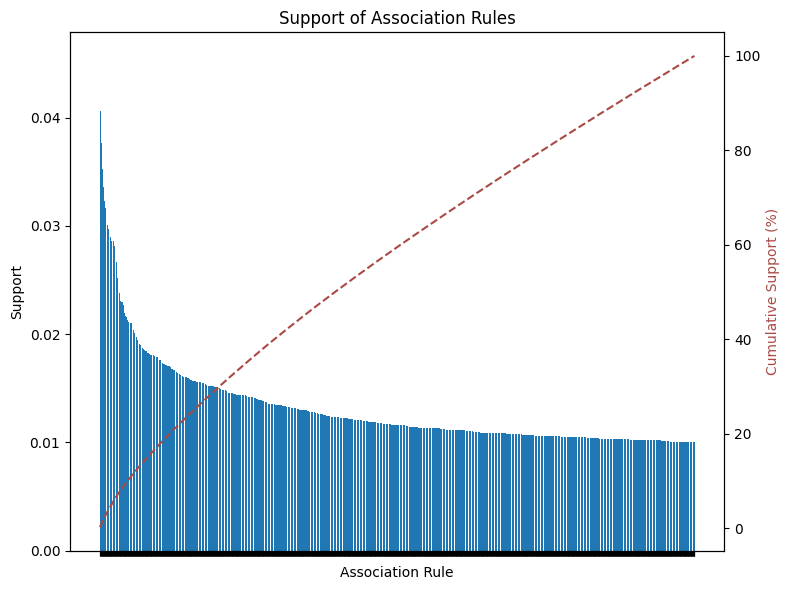

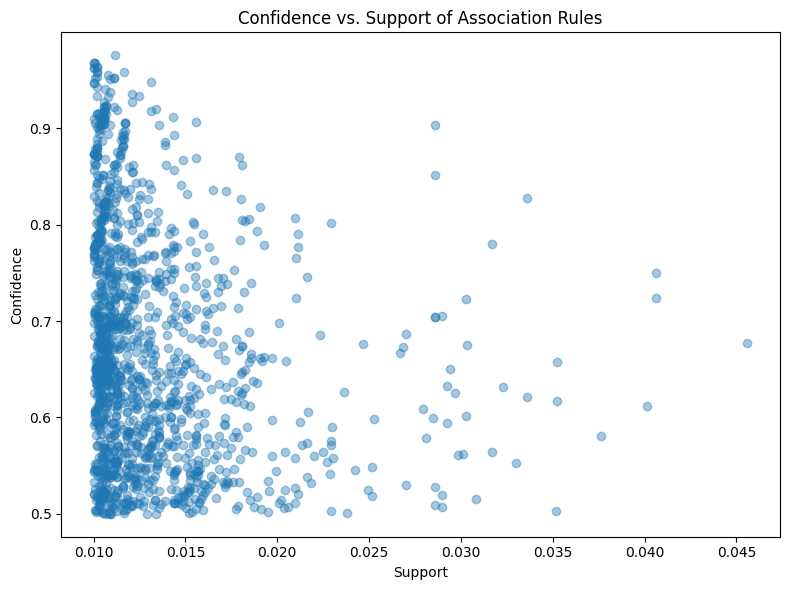

In [30]:
# Sort rules by support in descending order
sorted_rules = rules.sort_values(by='support', ascending=False)

# Calculate cumulative support
cumulative_support = np.cumsum(sorted_rules['support'] / np.sum(sorted_rules['support']) * 100)

# Bar plot for Support
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.bar(range(len(sorted_rules)), sorted_rules['support'], align='center')
plt.xticks(range(len(sorted_rules)), ['' for _ in range(len(sorted_rules))])  # Remove x-axis labels
ax1.set_xlabel('Association Rule')
ax1.set_ylabel('Support')
ax1.set_title('Support of Association Rules')

# CDF plot for cumulative support
ax2 = ax1.twinx()
ax2.plot(range(len(sorted_rules)), cumulative_support, color='#AA4A44', linestyle='--')
ax2.set_ylabel('Cumulative Support (%)', c='#AA4A44')

plt.tight_layout()
plt.show()

# Scatter plot for Confidence vs. Support
plt.figure(figsize=(8, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.4)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Confidence vs. Support of Association Rules')
plt.tight_layout()
plt.show()

These two visualizations explore the association rules: a bar plot for the support of association rules and a scatter plot for the confidence vs. support of association rules.

The bar plot represents the support values of the association rules. Each bar corresponds to a rule, and its height represents the support value, indicating how frequently the rule occurs in the dataset. The y-axis represents the support, while the x-axis does not display any labels, focusing solely on the visualization of support values.

The cumulative distribution function (CDF) plot showcases the cumulative support of the association rules as a percentage. It helps understand the distribution of support values across the rules in a cumulative manner. The red dashed line in the CDF plot connects the cumulative support values for each rule, providing insights into the accumulation of support as the rules progress.

The scatter plot displays the relationship between confidence and support for the association rules. Each point represents a rule, with the x-axis representing the support and the y-axis representing the confidence. The plot shows how the confidence varies with different levels of support, helping identify any patterns or trends between these two metrics.

These visualizations offer valuable insights into the support, confidence, and their relationships within the association rules, aiding in the interpretation and analysis of the rules' strength and significance.

## Cross-Selling and Upselling

In [31]:
# Filter association rules for cross-selling opportunities
cross_selling_rules = rules[(rules['antecedents'].apply(len) == 1) & (rules['consequents'].apply(len) == 1)]

# Sort rules based on confidence and support
cross_selling_rules = cross_selling_rules.sort_values(by=['confidence', 'support'], ascending=False)

# Select top cross-selling recommendations
top_cross_selling = cross_selling_rules.head(5)

# Filter association rules for upselling opportunities
upselling_rules = rules[(rules['antecedents'].apply(len) == 1) & (rules['consequents'].apply(len) > 1)]

# Sort rules based on confidence and support
upselling_rules = upselling_rules.sort_values(by=['confidence', 'support'], ascending=False)

# Select top upselling recommendations
top_upselling = upselling_rules.head(5)

# Display cross-selling recommendations
print("Cross-Selling Recommendations:")
for idx, row in top_cross_selling.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequent = list(row['consequents'])[0]
    print(f"Customers who bought '{antecedent}' also bought '{consequent}'.")

# Display upselling recommendations
print("\nUpselling Recommendations:")
for idx, row in top_upselling.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequents = list(row['consequents'])
    print(f"For customers who bought '{antecedent}', recommend the following upgrades: {', '.join(consequents)}.")

Cross-Selling Recommendations:
Customers who bought 'BEADED CRYSTAL HEART PINK ON STICK' also bought 'DOTCOM POSTAGE'.
Customers who bought 'HERB MARKER THYME' also bought 'HERB MARKER ROSEMARY'.
Customers who bought 'HERB MARKER ROSEMARY' also bought 'HERB MARKER THYME'.
Customers who bought 'HERB MARKER CHIVES' also bought 'HERB MARKER PARSLEY'.
Customers who bought 'REGENCY TEA PLATE PINK' also bought 'REGENCY TEA PLATE GREEN'.

Upselling Recommendations:
For customers who bought 'HERB MARKER CHIVES', recommend the following upgrades: HERB MARKER PARSLEY, HERB MARKER THYME.
For customers who bought 'HERB MARKER CHIVES', recommend the following upgrades: HERB MARKER PARSLEY, HERB MARKER MINT.
For customers who bought 'HERB MARKER CHIVES', recommend the following upgrades: HERB MARKER ROSEMARY, HERB MARKER PARSLEY.
For customers who bought 'HERB MARKER CHIVES', recommend the following upgrades: HERB MARKER ROSEMARY, HERB MARKER THYME.
For customers who bought 'HERB MARKER THYME', reco

### Upselling Recommendations

During the analysis of upselling opportunities, it was observed that multiple product recommendations were being made for the same item. To address this issue and provide more diverse recommendations, a modification was made to recommend only one product for each top item instead of recommending based on the top confidence values.

By implementing this change, we ensure that the upselling recommendations do not repeatedly suggest the same product to customers. This approach enhances the variety of product recommendations and increases the chances of cross-selling and upselling success.

The updated recommendation strategy focuses on identifying the top items and selecting a single recommended product for each of them. This adjustment aims to optimize the upselling strategy by suggesting different upgrades or add-on products to customers, resulting in a more compelling and varied range of recommendations.

In [32]:
top_upselling = upselling_rules.sort_values(['confidence', 'support'], ascending=False).drop_duplicates('antecedents')[:5]
for idx, row in top_upselling.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequents = list(row['consequents'])
    print(f"For customers who bought '{antecedent}', recommend the following upgrades: {', '.join(consequents)}.")

For customers who bought 'HERB MARKER CHIVES', recommend the following upgrades: HERB MARKER PARSLEY, HERB MARKER THYME.
For customers who bought 'HERB MARKER THYME', recommend the following upgrades: HERB MARKER ROSEMARY, HERB MARKER PARSLEY.
For customers who bought 'HERB MARKER PARSLEY', recommend the following upgrades: HERB MARKER ROSEMARY, HERB MARKER THYME.
For customers who bought 'HERB MARKER ROSEMARY', recommend the following upgrades: HERB MARKER PARSLEY, HERB MARKER THYME.
For customers who bought 'REGENCY TEA PLATE PINK', recommend the following upgrades: REGENCY TEA PLATE GREEN, REGENCY TEA PLATE ROSES.


# Conclusion

In this project, we explored the concept of association rules using the Apriori algorithm and the mlxtend library in Python. Association rules analysis provides valuable insights into the relationships and patterns within a dataset, enabling businesses to uncover hidden associations between items and make informed decisions for various applications.

We started by preparing the data and filtering out infrequent items and irrelevant transactions. Then, we generated frequent itemsets and association rules based on predefined thresholds for support and confidence. These rules allowed us to identify significant associations between items and quantify their strength.

The generated association rules provided actionable insights for different business scenarios. We explored cross-selling opportunities by identifying products frequently purchased together. By leveraging these associations, businesses can implement effective cross-selling strategies, offering relevant add-on products or upgrades to customers, thereby increasing revenue.

Additionally, we examined upselling recommendations, focusing on identifying suitable product upgrades or higher-priced alternatives for customers. By considering only one product recommendation for each top item, we ensured diverse and relevant suggestions, avoiding repetitive recommendations and enhancing the upselling strategy.

Furthermore, we discussed the importance of interpreting the support, confidence, lift, leverage, and conviction metrics associated with association rules. These metrics provide quantitative measures of the strength, significance, and impact of the associations, enabling businesses to prioritize and optimize their decision-making processes.

Overall, association rules analysis offers valuable insights and practical applications across various domains, such as marketing, product recommendations, cross-selling strategies, and process optimization. By understanding the associations between items, businesses can make data-driven decisions, improve customer satisfaction, enhance marketing campaigns, and drive business growth.

It is important to note that the analysis and insights provided in this project are specific to the dataset and parameters used. The results can be further refined and customized based on the specific requirements, domain knowledge, and business objectives.
